# Análisis de los factores que influyen en la inseguridad alimentaria en México


## Enunciado del problema

Un centro de salud nutricional está interesado en analizar estadística y probabilísticamente los patrones de gasto en alimentos saludables y no saludables en los hogares mexicanos con base en su nivel socioeconómico, en si el hogar tiene recursos financieros extra al ingreso y en si presenta o no inseguridad alimentaria. Además, está interesado en un modelo que le permita identificar los determinantes socioeconómicos de la inseguridad alimentaria.

La base de datos es un extracto de la Encuesta Nacional de Salud y Nutrición (2012) levantada por el Instituto Nacional de Salud Pública en México. La mayoría de las personas afirman que los hogares con menor nivel socioeconómico tienden a gastar más en productos no saludables que las personas con mayores niveles socioeconómicos y que esto, entre otros determinantes, lleva a que un hogar presente cierta inseguridad alimentaria.

La base de datos contiene las siguientes variables:

- `nse5f` (nivel socieconómico del hogar): 1 "Bajo", 2 "Medio bajo", 3 "Medio", 4 "Medio alto", 5 "Alto"
- `area` (zona geográfica): 0 "Zona urbana", 1 "Zona rural"
- `numpeho` (número de personas en el hogar)
- `refin` (recursos financieros distintos al ingreso laboral): 0 "no", 1 "sí"
- `edadjef` (edad del jefe/a de familia)
- `sexojef` (sexo del jefe/a de familia): 0 "Hombre", 1 "Mujer"
- `añosedu` (años de educación del jefe de familia)
- `ln_als` (logarítmo natural del gasto en alimentos saludables)
- `ln_alns` (logarítmo natural del gasto en alimentos no saludables)
- `IA` (inseguridad alimentaria en el hogar): 0 "No presenta IA", 1 "Presenta IA"

``` R
df <- read.csv("https://raw.githubusercontent.com/beduExpert/Programacion-R-Santander-2022/main/Sesion-08/Postwork/inseguridad_alimentaria_bedu.csv")
```

1) Plantea el problema del caso
2) Realiza un análisis descriptivo de la información
3) Calcula probabilidades que nos permitan entender el problema en México
4) Plantea hipótesis estadísticas y concluye sobre ellas para entender el problema en México
5) Estima un modelo de regresión, lineal o logístico, para identificar los determinanres de la inseguridad alimentaria en México
6) Escribe tu análisis en un archivo README.md y tu código en un script de R y publica ambos en un repositorio de Github.

> NOTA: Todo tu planteamiento deberá estár correctamente desarrollado y deberás analizar e interpretar todos tus resultados para poder dar una conclusión final al problema planteado.

## 1) Planteamiento del problema del caso

### Objetivos

- Analizar patrones de gasto en alimentos saludables y no saludables en familias mexicanas con base en:

    - el nivel socioeconómico
    - disponibilidad de recursos financieros adicionales al ingreso
    - presencia de inseguridad alimentaria

- Elaborar un modelo que permita identificar los determinantes socioeconómicos de la inseguridad alimentaria (IA) con base en las variables disponibles en el extracto de la Encuesta Nacional de Salud y Nutrición 2012 del Instituto Nacional de Salud Pública en México (ENSANUT 2012)

## 2) Análisis descriptivo de la información

In [1]:
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Obtención de los datos:

In [2]:
url <- "https://raw.githubusercontent.com/beduExpert/Programacion-R-Santander-2022/main/Sesion-08/Postwork/inseguridad_alimentaria_bedu.csv"
datos <- read.csv(url, encoding = "UTF-8")
head(datos)

nse5f,area,numpeho,refin,edadjef,sexojef,añosedu,IA,ln_als,ln_alns
5,0,4,0,43,0,24,0,5.393628,NA
5,0,5,1,NA,NA,24,0,7.024649,NA
5,0,4,0,46,0,24,0,6.767343,4.605170
5,1,1,0,54,0,24,0,3.401197,4.094345
5,0,2,1,39,0,24,0,6.115892,5.480639
5,0,5,1,NA,NA,24,0,7.514800,5.598422


Para obtener un resumen estadístico de los datos, se convierten en factores las variables discretas.

In [3]:
datos$nse5f <- factor(datos$nse5f,
                      levels = 1:5,
                      labels = c("Bajo", "Medio bajo", "Medio", "Medio alto", "Alto"),
                      ordered = TRUE)
datos$area <- factor(datos$area,
                     levels = 0:1,
                     labels = c("Zona urbana", "Zona rural"))
datos$refin <- factor(datos$refin,
                      levels = 0:1,
                      labels = c("no", "sí"))
datos$sexojef <- factor(datos$sexojef,
                       levels = 0:1,
                       labels = c("Hombre", "Mujer"))
datos$IA <- factor(datos$IA,
                   levels = 0:1,
                   labels = c("No presenta IA", "Presenta IA"))

Y, enseguida, el resumen estadístico.

In [4]:
dim(datos)

[1] 40809    10

In [5]:
sum(complete.cases(datos))

[1] 20280

In [6]:
summary(datos)

        nse5f               area          numpeho       refin     
 Bajo      :8858   Zona urbana:26591   Min.   : 1.000   no:33046  
 Medio bajo:8560   Zona rural :14218   1st Qu.: 3.000   sí: 7763  
 Medio     :8323                       Median : 4.000             
 Medio alto:7903                       Mean   : 3.941             
 Alto      :7165                       3rd Qu.: 5.000             
                                       Max.   :19.000             
                                                                  
    edadjef       sexojef         añosedu                   IA       
 Min.   : 18    Hombre:26957   Min.   : 0.00   No presenta IA:10781  
 1st Qu.: 37    Mujer : 8861   1st Qu.: 9.00   Presenta IA   :30028  
 Median : 47    NA's  : 4991   Median : 9.00                         
 Mean   : 49                   Mean   :10.36                         
 3rd Qu.: 60                   3rd Qu.:12.00                         
 Max.   :111                   Max.   :24.00

La base de datos tiene 40,809 registros, de los cuales 20,280, poco menos de la mitad,  tienen información completa para todos los campos. 

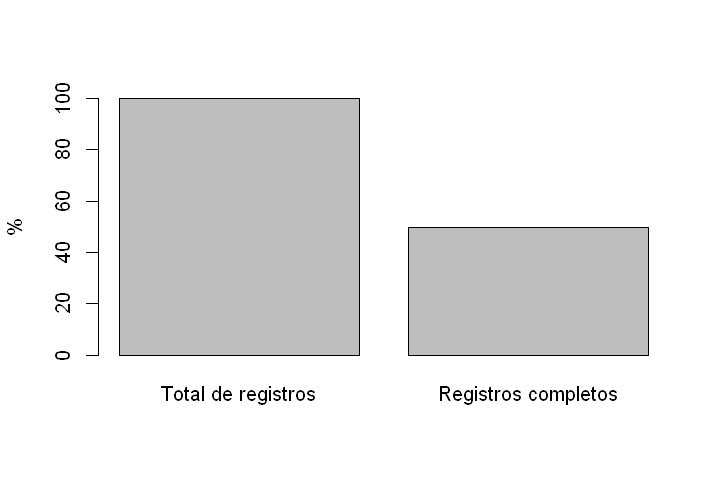

In [26]:
barplot(c(100, sum(complete.cases(datos))/nrow(datos)*100),
        names.arg = c("Total de registros", "Registros completos"),
        ylab = "%")

Con una mezcla más o menos homogénea de niveles socioeconómicos, con una tendencia ligeramente decreciente conforme aumenta el nivel socioeconómico, con entre 7,000 y 9,000 hogares por nivel. 

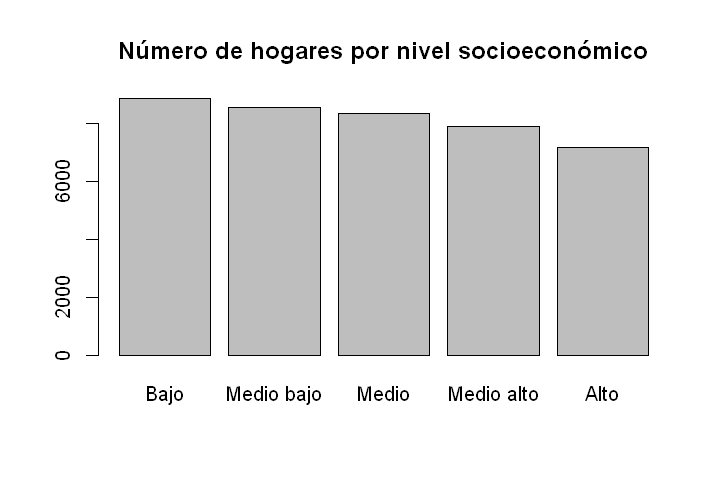

In [27]:
plot(datos$nse5f,
     main = "Número de hogares por nivel socioeconómico")

La muestra es mayoritariamente de hogares urbanos, aproximadamente en dos terceras partes.

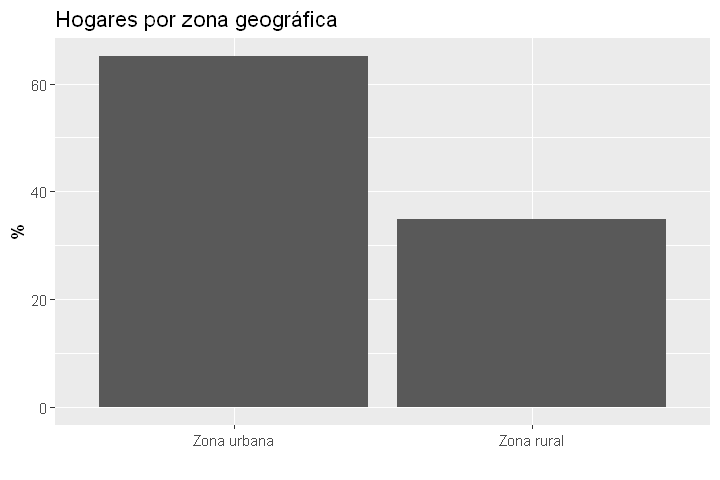

In [28]:
ggplot(datos, aes(x = area)) +
  geom_bar(aes(y = (..count..)/sum(..count..)*100)) +
  labs(title = "Hogares por zona geográfica",
       x = "", y = "%")

De la información proporcionada por `summary`, se observa que el número de personas por hogar varía entre 1 y 19, con una media de 3.9 y una mediana de 4. El 75% de los hogares es habitado por 5 personas o menos y el 50% por entre 3 y 5 personas. Asimismo, el 95% de los hogares tiene 7 o menos habitantes, siendo la excepción los valores mayores.

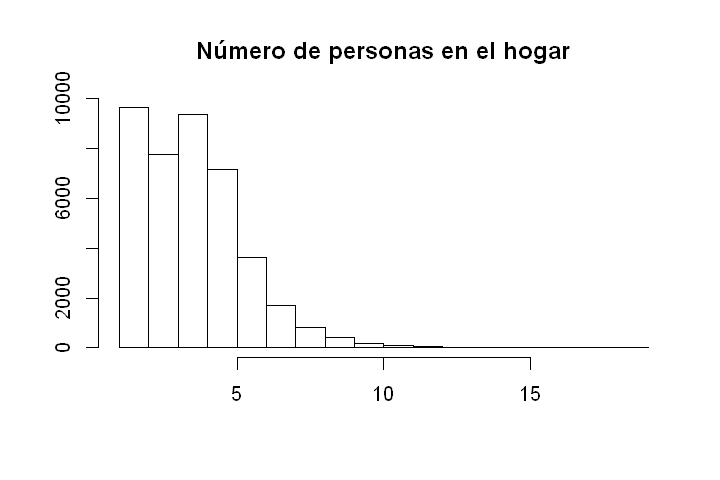

In [29]:
hist(datos$numpeho,
     main = "Número de personas en el hogar",
     xlab = "",
ylab = "")

In [13]:
quantile(datos$numpeho, probs = 0.95)

95% 
  7

En cuanto a recursos financieros adicionales al ingreso, únicamente uno de cada cinco hogares disponen de ellos.

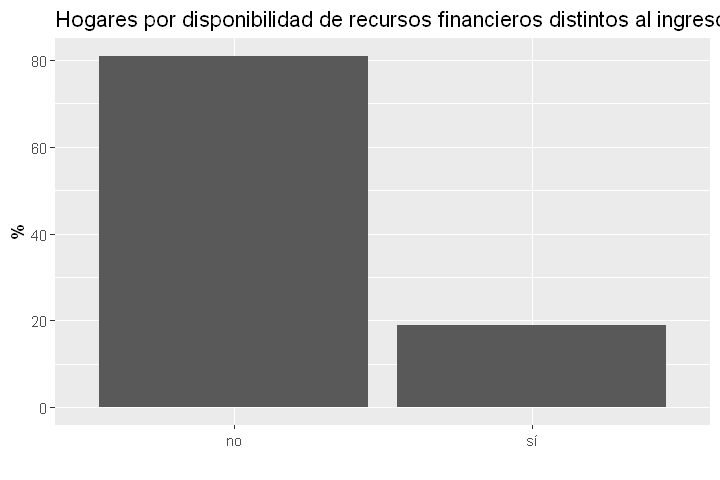

In [30]:
ggplot(datos, aes(x = refin)) +
  geom_bar(aes(y = (..count..)/sum(..count..)*100)) +
  labs(title = "Hogares por disponibilidad de recursos financieros distintos al ingreso",
       x = "", y = "%")

Igualmente, `summary` nos informa que el promedio de edad del jefe de familia es de 49 años, y la mediana, 47. La edad mínima reportada es de 18 años, y la máxima, de 111 (un posible error de captura). El 50% de las edades de los jefes de familia se ubica entre 37 y 60 años. El 75% de los jefes de familia son menores de 60 años, y el 90%, menores de 72. Para 5,017 de los hogares (12%) no se cuenta con este dato.

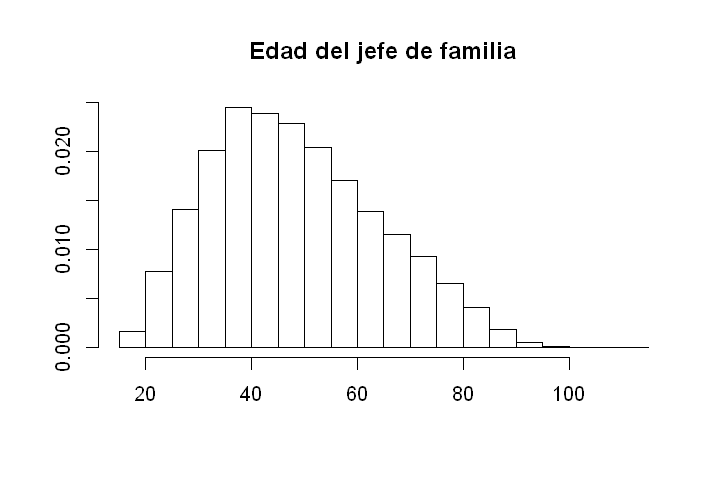

In [31]:
hist(datos$edadjef,
     freq = FALSE,
     main = "Edad del jefe de familia",
     xlab = "",
     ylab = "")

In [16]:
quantile(datos$edadjef, probs = 0.90, na.rm = TRUE)

90% 
 72

En alrededor del 65% de los hogares, el jefe de familia es hombre, mientras que en poco más de un 20% es mujer. Aproximadamente un 10% no proporcionó este dato, por lo que la proporción verdadera de hombres jefes de familia podría oscilar entre 65 y 80%.

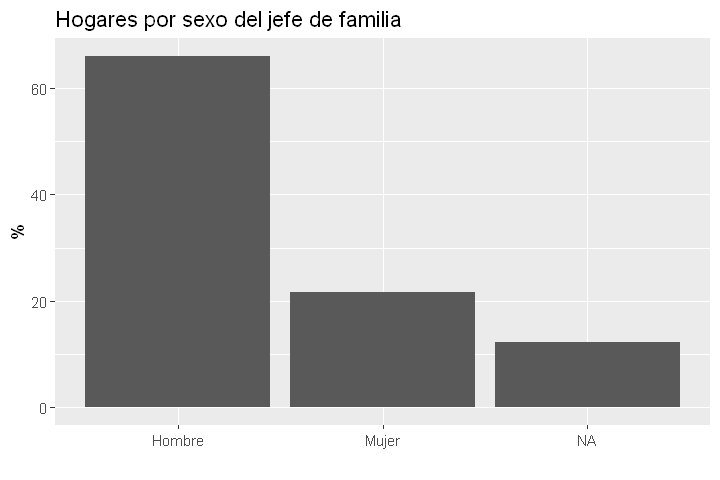

In [22]:
ggplot(datos, aes(x = sexojef)) +
  geom_bar(aes(y = (..count..)/sum(..count..)*100)) +
  labs(title = "Hogares por sexo del jefe de familia",
       x = "", y = "%")

El promedio de años de estudio del jefe del hogar es 10.4 (preparatoria inconclusa), y la mediana, 9 (secundaria completa). Solo el 25% de los jefes de familia cuentan con estudios superiores a la preparatoria. El máximo de años de estudio para el jefe del hogar es de 24.

Es de observarse en el histograma que la mayoría de los datos se ubican entre los 8 y 12 años de estudio, con solo pocos datos fuera de este rango.

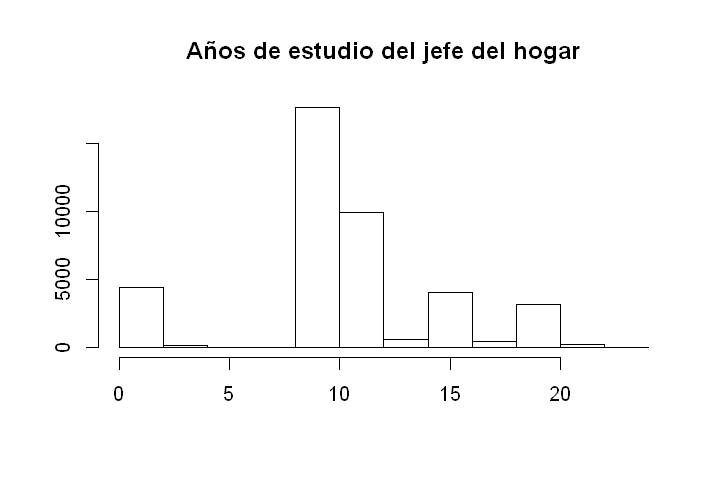

In [21]:
hist(datos$añosedu,
     main = "Años de estudio del jefe del hogar",
     xlab = "",
     ylab = "")

En lo que respecta a la insuficiencia alimentaria, una cuarta parte de los hogares la presentan.

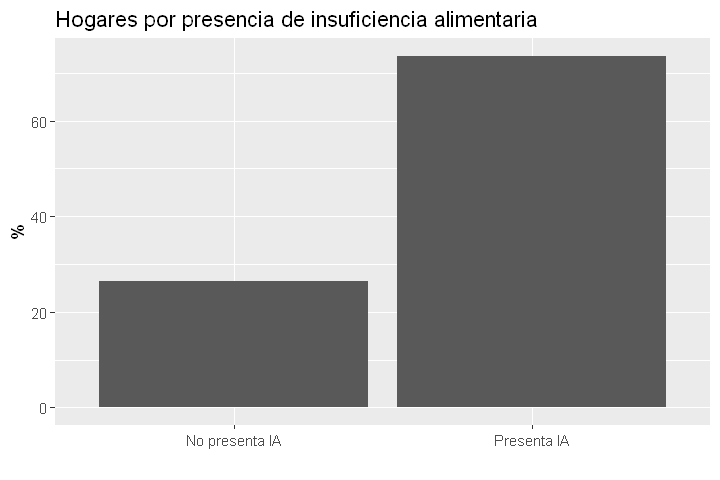

In [20]:
ggplot(datos, aes(x = IA)) +
  geom_bar(aes(y = (..count..)/sum(..count..)*100)) +
  labs(title = "Hogares por presencia de insuficiencia alimentaria",
       x = "", y = "%")

Se observa que los hogares gastan más, en promedio, en alimentos saludables que lo que gastan en alimentos no saludables (en, aproximadamente, casi un orden de magnitud, siete veces más). 

La dispersión del gasto en alimentos saludables es menor que la del gasto en alimentos no saludables. Para los alimentos saludables, el tercer cuartil gasta 2.33 veces más que el primero, mientras que para los alimentos no saludables, el tercer cuartil representa un gasto 38 veces mayor que el primero.

> ***Nota***: *Los datos de gasto en alimentos disponibles en la Encuesta son logaritmos, por lo que, para la comparación de los rangos intercuartílicos, se utiliza una división ya que la resta de logaritmos equivale a una división*.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 18291 rows containing non-finite values (stat_bin)."

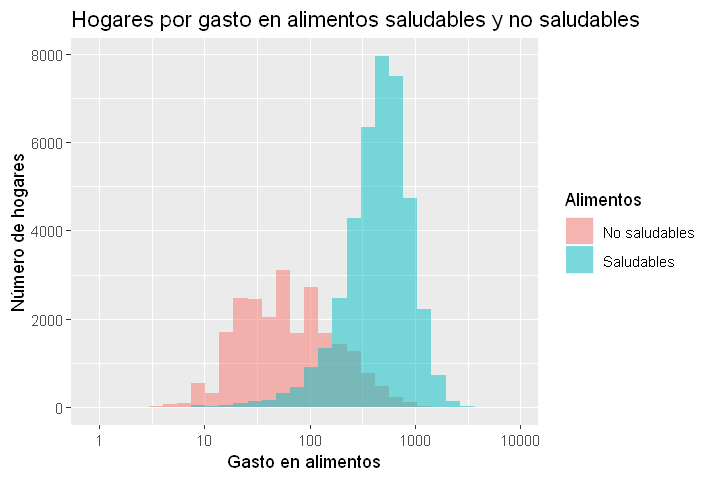

In [23]:
als <- data.frame(val = datos$ln_als)
alns <- data.frame(val = datos$ln_alns)
als$Alimentos <- "Saludables"
alns$Alimentos <- "No saludables"
d <- rbind(als, alns)
ggplot(d, aes(exp(val), fill = Alimentos)) + 
  geom_histogram(alpha = 0.5, position = "identity") +
  scale_x_log10() +
  labs(title = "Hogares por gasto en alimentos saludables y no saludables",
       x = "Gasto en alimentos",
       y = "Número de hogares")

In [24]:
exp(mean(datos$ln_als, na.rm = TRUE))
exp(quantile(datos$ln_als, probs = c(0.25, 0.5, 0.75), na.rm = TRUE))
exp(mean(datos$ln_alns, na.rm = TRUE))
exp(quantile(datos$ln_alns, probs = c(0.25, 0.5, 0.75), na.rm = TRUE))

[1] 431.1782

25% 50% 75% 
300 475 700

[1] 61.86413

25% 50% 75% 
 30  56 130

## 3) Algunas probabilidades para un mejor entendimiento del problema

Ya en la sección anterior se hizo una descripción estadística de los datos que, desde el punto de vista frecuentista, es una estimación de las probabilidades asociadas a la población de la que se extrajo la muestra.

La similitud en el número de hogares en cada nivel socioeconómico hace suponer que no se trata de una muestra aleatoria, ya que, de ser ese el caso, se esperaría encontrar una cantidad mucho menor de hogares en los niveles alto y medio alto. Al parecer, se trató de encuestar una cantidad igual o similar de hogares en cada uno de los niveles socioeconómicos, aleatorizando la toma de muestra dentro de cada nivel pero no entre los niveles. Esto se podría corroborar en las notas técnicas de la Encuesta.

Se esperaría que la probabilidad de que un hogar presente inseguridad alimentaria (IA) disminuiría conforme aumente el nivel socioeconómico. Así parece comportarse la muestra pero llama la atención la prevalencia de la IA incluso en el nivel socioeconómico alto, donde la probabilidad de que un hogar presente IA es cercana al 50%.

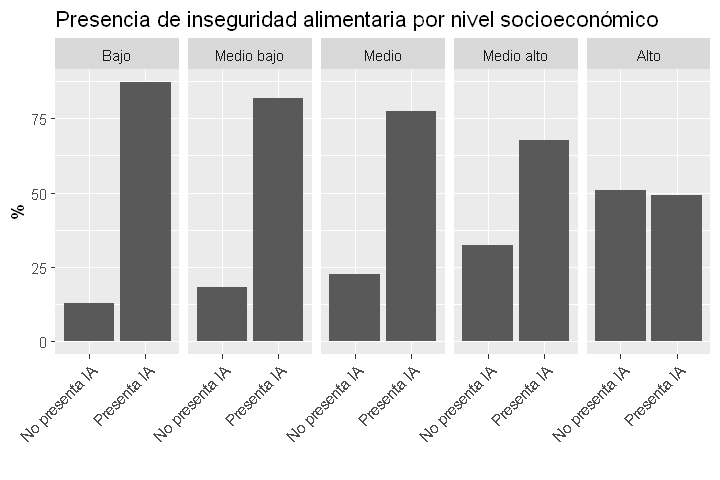

In [25]:
ggplot(datos, aes(x = IA)) +
  geom_bar(aes(y = (..count..)/tapply(..count.., ..PANEL.., sum)[..PANEL..]*100)) +
  facet_grid(cols = vars(nse5f)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Presencia de inseguridad alimentaria por nivel socioeconómico",
       x = "", y = "%")

Igualmente, es más probable que un hogar presente IA en las zonas rurales (80%) que en las urbanas (70%).

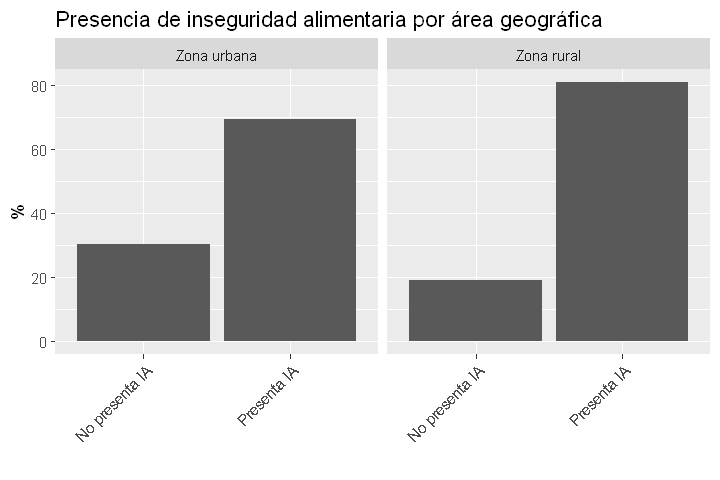

In [32]:
ggplot(datos, aes(x = IA)) +
  geom_bar(aes(y = (..count..)/tapply(..count.., ..PANEL.., sum)[..PANEL..]*100)) +
  facet_grid(cols = vars(area)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Presencia de inseguridad alimentaria por área geográfica",
       x = "", y = "%")

La probabilidad de que un hogar presente IA no parece depender de que el jefe de familia sea hombre o mujer.

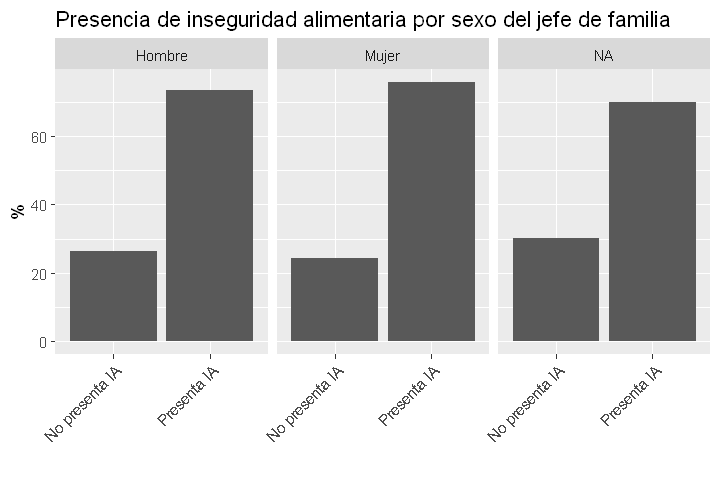

In [33]:
ggplot(datos, aes(x = IA)) +
  geom_bar(aes(y = (..count..)/tapply(..count.., ..PANEL.., sum)[..PANEL..]*100)) +
  facet_grid(cols = vars(sexojef)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Presencia de inseguridad alimentaria por sexo del jefe de familia",
       x = "", y = "%")

## 4) Hipótesis y conclusiones sobre la IA en México

Del enunciado tomamos que: "*La mayoría de las personas afirman que los hogares con menor nivel socioeconómico tienden a gastar más en productos no saludables que las personas con mayores niveles socioeconómicos y que esto, entre otros determinantes, lleva a que un hogar presente cierta inseguridad alimentaria*".

### Los hogares con menor NSE tienden a gastar más en productos no saludables

#### Hipótesis

- Ho: La media del logaritmo del gasto en alimentos no saludables es igual independientemente del nivel socioeconómico
- Ha: La media del logaritmo del gasto en alimentos no saludables aumenta con el nivel socioeconómico

De manera expliratoria, se visualizan los datos.

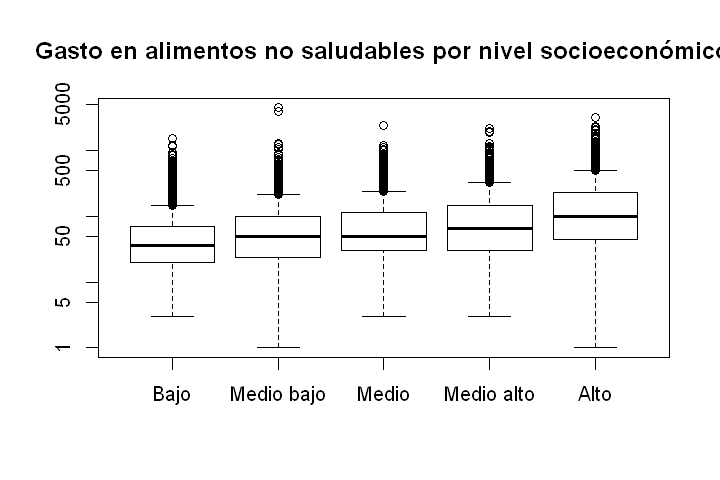

In [34]:
plot(datos$nse5f, exp(datos$ln_alns),
     log = "y",
     main = "Gasto en alimentos no saludables por nivel socioeconómico",
     xlab = "",
     ylab = "") 

Se observa que, por el contrario a lo supuesto, el gasto en alimentos no saludables, se incrementa con el NSE. Y lo mismo con el gasto en alimentos saludables.

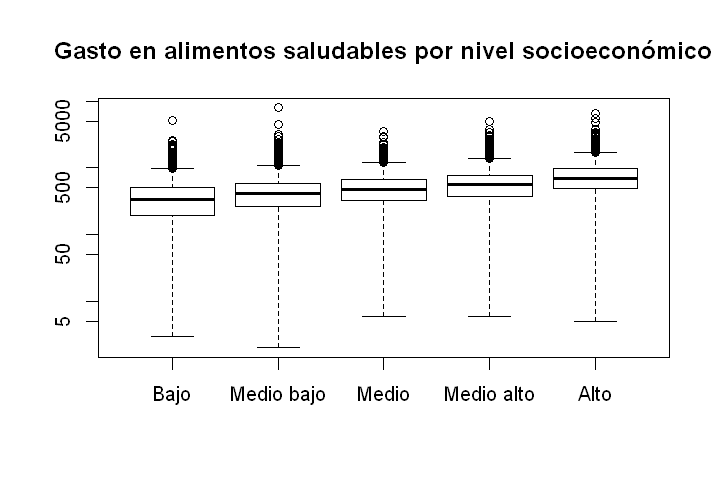

In [35]:
plot(datos$nse5f, exp(datos$ln_als),
     log = "y",
     main = "Gasto en alimentos saludables por nivel socioeconómico",
     xlab = "",
     ylab = "") 

Lo cual no es de extrañar, debido a que los hogares con mayor NSE disponen de mayor cantidad de dinero para gastar. Lo que interesa es la proporción.

- Ho: La media de la diferencia entre el logaritmo del gasto en alimentos no saludables y saludables es igual independientemente del nivel socioeconómico
- Ha: La media de la diferencia entre el logaritmo del gasto en alimentos no saludables y saludables disminuye con el nivel socioeconómico

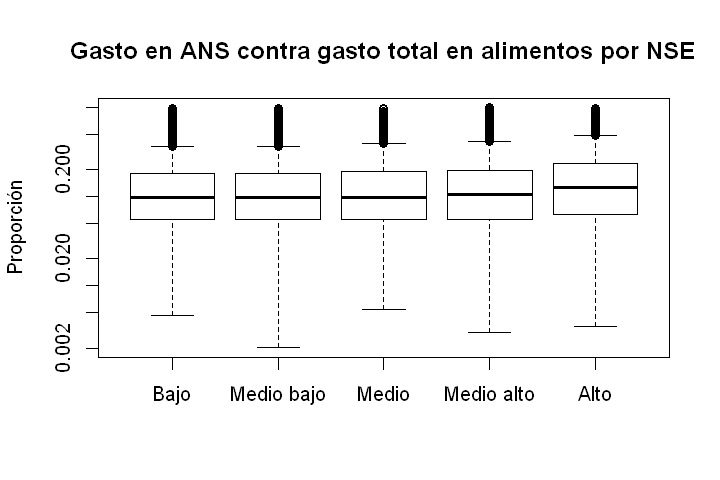

In [36]:
datos$prop_alns <- exp(datos$ln_alns) / (exp(datos$ln_alns) + exp(datos$ln_als)) 
plot(datos$nse5f, datos$prop_alns,
     main = "Gasto en ANS contra gasto total en alimentos por NSE",
     log = "y",
     xlab = "",
     ylab = "Proporción") 

In [37]:
summary(aov(prop_alns ~ nse5f, data = datos))

               Df Sum Sq Mean Sq F value Pr(>F)    
nse5f           4    2.1  0.5328   29.38 <2e-16 ***
Residuals   23196  420.6  0.0181                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
17608 observations deleted due to missingness

El resultado del ANOVA nos permite concluir que hay diferencia significativa entre la proporción del gasto en alimentos no saludables contra el gasto total en alimentos entre los diferentes niveles socioeconómicos. Sin embargo, de las gráficas se observa que los niveles socioeconómicos altos gastan más, en proporción, en alimentos no saludables que los niveles socioeconómicos bajos.

### Los hogares con menor NSE presentan en mayor proporción IA

#### Hipótesis

- Ho: La media del logaritmo del gasto en alimentos no saludables es igual independientemente del nivel socioeconómico
- Ha: La media del logaritmo del gasto en alimentos no saludables aumenta con el nivel socioeconómico

            
             No presenta IA Presenta IA
  Bajo                 1143        7715
  Medio bajo           1550        7010
  Medio                1877        6446
  Medio alto           2566        5337
  Alto                 3645        3520


	Pearson's Chi-squared test

data:  tabla_1
X-squared = 3553.4, df = 4, p-value < 2.2e-16


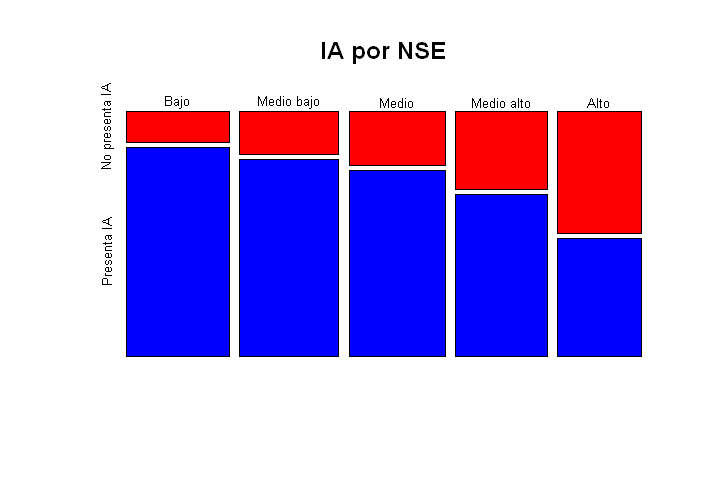

In [39]:
tabla_1 <- table(datos$nse5f, datos$IA)
tabla_1
plot(tabla_1, col = c("red", "blue"), main = "IA por NSE") 
chisq.test(tabla_1)

Con un chi cuadrado alto y un *p*-value menor que 0.05, se rechaza la hipotesis nula y se concluye que NSE e IA tienen una relación significativa y, de la gráfica, se observa que la relación es consistente con una disminución en la incidencia de IA conforme aumenta el NSE.


## 5) Modelo de regresión

Dado que el problema es uno de clasificación (presencia o ausencia de inseguridad alimentaria), se utilizará un modelo de regresión logística. Se planea incluir, inicialmente, todas las variables.

En la sección relativa al análisis descriptivo de la información ya se mencionaron los valores faltantes en ciertas variables. La biblioteca `Amelia` permite visualizar gráficamente la densidad de dichos valores faltantes.

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


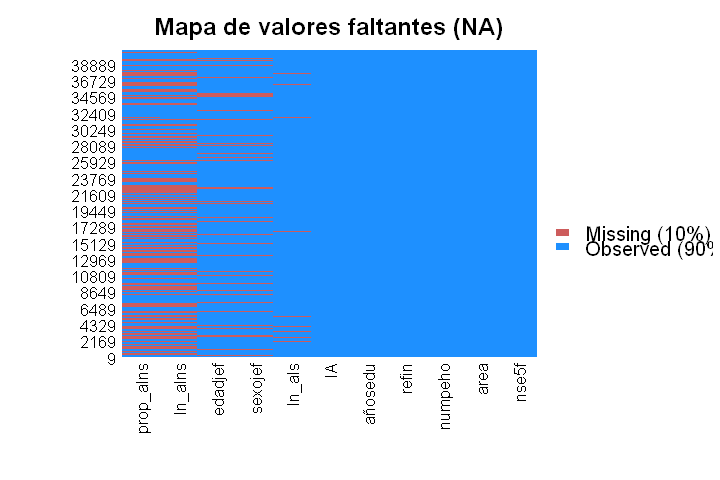

In [47]:
library(Amelia)
missmap(datos,
        main = "Mapa de valores faltantes (NA)")

La variable `ln_alns`, que representa el logaritmo natural del gasto en alimentos no saludables, presenta la mayor densidad de datos faltantes (17,504 registros), por lo que es candidata a eliminarla del análisis. Sin embargo, por lo que representa, se considera que puede ser un buen predictor de inseguridad alimentaria, por lo que se decide conservarlo.

El modelo inicial considera todos los factores con sus interacciones de segundo grado.

In [45]:
m1 <- glm(IA ~ (nse5f + area + numpeho + refin + edadjef + sexojef + añosedu + ln_als + ln_alns)^2,
         data = datos,
         family = binomial)
summary(m1)


Call:
glm(formula = IA ~ (nse5f + area + numpeho + refin + edadjef + 
    sexojef + añosedu + ln_als + ln_alns)^2, family = binomial, 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7898  -1.0230   0.5959   0.8108   1.8583  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.6972136  1.2919527   1.314 0.188954    
nse5f.L                     -0.3183660  0.5916738  -0.538 0.590524    
nse5f.Q                      1.6518814  0.4613047   3.581 0.000342 ***
nse5f.C                      0.1451875  0.4392013   0.331 0.740968    
nse5f^4                      0.0799632  0.4462598   0.179 0.857792    
areaZona rural              -1.0546597  0.4880544  -2.161 0.030699 *  
numpeho                      0.5417532  0.1159581   4.672 2.98e-06 ***
refinsí                      0.4578141  0.5372333   0.852 0.394120    
edadjef                     -0.0071308  0.0126042  -0.566 0.571569    
sexojef

Se encuentran los siguientes factores con influencia significativa ($\alpha = 0.05$):

- Nivel socioeconómico
- Área geográfica
- Número de personas en el hogar
- Años de educación del jefe de familia

Así como las siguientes interacciones:

- Nivel socioeconómico con:
    - Número de personas en el hogar
    - Edad del jefe de familia
    - Gasto en alimentos saludables
    - Gasto en alimentos no saludables

- Área geográfica con:
    - Edad del jefe de familia
    
- Número de personas con:
    - Años de educación del jefe de familia
    - Gasto en alimentos saludables
    
- Edad del jefe de familia con:
    - Sexo del jefe de familia
    
Por lo que se desechan las siguientes variables, para las que no se encontraron efectos significativos:

- Disponibilidad de recursos financieros distintos al ingreso

Es de observar que los siguietes factores no presentan un efecto significativo como elementos de primer orden (sin interacción) aunque si lo presentan en el segundo orden (en interacción con otros):

- Edad del jefe de familia
- Sexo del jefe de familia
- Años de educación del jefe de familia
- Gasto en alimentos saludables
- Gasto en alimentos no saludables

Como comparación, se analiza un modelo exclusivamente de primer orden:

In [48]:
m0 <- glm(IA ~ nse5f + area + numpeho + refin + edadjef + sexojef + añosedu + ln_als + ln_alns,
         data = datos,
         family = binomial)
summary(m0)


Call:
glm(formula = IA ~ nse5f + area + numpeho + refin + edadjef + 
    sexojef + añosedu + ln_als + ln_alns, family = binomial, 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6972  -1.0549   0.6105   0.8063   1.6641  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.740492   0.194519   8.948  < 2e-16 ***
nse5f.L        -1.135245   0.049522 -22.924  < 2e-16 ***
nse5f.Q        -0.192516   0.039620  -4.859 1.18e-06 ***
nse5f.C        -0.097047   0.037984  -2.555 0.010621 *  
nse5f^4         0.017179   0.037188   0.462 0.644107    
areaZona rural -0.089011   0.041162  -2.162 0.030585 *  
numpeho         0.176586   0.010707  16.493  < 2e-16 ***
refinsí         0.395129   0.044673   8.845  < 2e-16 ***
edadjef         0.001140   0.001240   0.920 0.357796    
sexojefMujer    0.149462   0.041336   3.616 0.000299 ***
añosedu        -0.051213   0.004514 -11.345  < 2e-16 ***
ln_als         -0.091515   0.028626  

En el modelo de primer orden, la disponibilidad de recursos financieros distintos del ingreso sí es un factor significativo, y el sexo y los años de educación del jefe de familia y el gasto en alimentos saludables y no saludables son significativos por sí mismos. Esto se explica porque la variabilidad observada es mejor explicada por las interacciones de los factores una vez que se toma en cuenta.

Descartando los factores e interacciones que se encontraron no significativas, tenemos el siguiente modelo:

In [49]:
m2 <- glm(IA ~ nse5f + area + numpeho + añosedu +
            nse5f:numpeho + nse5f:edadjef + nse5f:ln_als + nse5f:ln_alns +
            area:edadjef +
            numpeho:añosedu + numpeho:ln_als +
            edadjef:sexojef,
          data = datos,
          family = binomial)
summary(m2)


Call:
glm(formula = IA ~ nse5f + area + numpeho + añosedu + nse5f:numpeho + 
    nse5f:edadjef + nse5f:ln_als + nse5f:ln_alns + area:edadjef + 
    numpeho:añosedu + numpeho:ln_als + edadjef:sexojef, family = binomial, 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7664  -1.0554   0.6061   0.8156   1.7634  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.8219783  0.3688648   2.228 0.025854 *  
nse5f.L                 -0.3321930  0.4259754  -0.780 0.435485    
nse5f.Q                  1.2918995  0.4172007   3.097 0.001958 ** 
nse5f.C                 -0.0727779  0.4018773  -0.181 0.856293    
nse5f^4                  0.1049406  0.4100867   0.256 0.798029    
areaZona rural          -0.3174145  0.1303123  -2.436 0.014859 *  
numpeho                  0.4738410  0.0956439   4.954 7.26e-07 ***
añosedu                 -0.0759381  0.0095680  -7.937 2.08e-15 ***
nse5f.L:numpeho          0.04

En este nuevo modelo, pierde significancia el termino de interacción entre el área geográfica y la edad del jefe de familia, por lo que se descarta:

In [50]:
m3 <- update(m2, ~ . - area:edadjef)
summary(m3)


Call:
glm(formula = IA ~ nse5f + area + numpeho + añosedu + nse5f:numpeho + 
    nse5f:edadjef + nse5f:ln_als + nse5f:ln_alns + numpeho:añosedu + 
    numpeho:ln_als + edadjef:sexojef, family = binomial, data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7505  -1.0541   0.6071   0.8155   1.7596  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.7598950  0.3668154   2.072 0.038303 *  
nse5f.L                 -0.2324831  0.4216156  -0.551 0.581353    
nse5f.Q                  1.2827956  0.4172400   3.074 0.002109 ** 
nse5f.C                 -0.0708361  0.4019901  -0.176 0.860126    
nse5f^4                  0.1066218  0.4101872   0.260 0.794914    
areaZona rural          -0.1156758  0.0413340  -2.799 0.005133 ** 
numpeho                  0.4714338  0.0956059   4.931 8.18e-07 ***
añosedu                 -0.0761732  0.0095616  -7.967 1.63e-15 ***
nse5f.L:numpeho          0.0448250  0.0265511   1

En este último modelo, todos los términos tienen una significancia superior al 0.05.

Es de hacer notar que ciertos niveles socioeconómicos (variable categórica) no inciden sobre la posibilidad de que el hogar presente inseguridad alimentaria.

Los coeficientes estimados representan los momios asociados a las variables (posibilidad de que se presente inseguridad alimentaria dividida entre la posibilidad de que no se presente). Un momio negativo representa una disminución de la probabilidad, y uno positivo, un incremento en la misma.

Así, por ejemplo, vivir en una zona rural disminuye el momio de incidencia de la inseguridad alimentaria en un factor de 0.1157, mientras que por cada persona adicional que viva en un hogar, el momio se incrementa en un factor de 0.47.

## 6) Conclusiones

- Sorpresivamente, el incremento en el nivel socioeconómico del hogar aumenta la probabilidad de que se presente inseguridad alimentaria (momio positivo para el contraste cuadrático de nse5f).
- En los hogares rurales es menos probable que se presente inseguridad alimentaria.
- El incremento en el número de personas que viven en un hogar aumenta la probabilidad de que se resente inseguridad alimentaria.
- A mayor grado de estudios del jefe de familia, menor probabilidad de que su hogar presente inseguridad alimentaria.
- El incremento en la probabilidad de inseguridad alimentaria por el número de personas, se potencia con el incremento en el nivel socioeconómico del hogar (interacción cúbica nse5f.C:numpeho).
- El incremento en la edad del jefe de familia aumenta la probabilidad de que el hogar presente inseguridad alimentaria en los niveles socioeconómicos bajo y medio, pero la disminuye en el nivel alto.
- Sorpresivamente también, el incremento en el gasto en alimentos *saludables* aumenta la probabilidad de inseguridad alimentaria en hogares de nivel socieconómico medio bajo y medio, mientras que el aumento en el gasto en alimentos *no saludables* lo disminuye en los niveles socioeconómicos medio y alto.
- No están claros los efectos de la interacción entre el número de personas en el hogar y los años de educación del jefe de familia y el gasto en alimentos saludables.
- A mayor edad del jefe de familia, se incrementa el riesgo de que el hogar presente inseguridad alimentaria cuando el jefe de familia es mujer.
